# univariate time series forecasting

import libraries required

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

define input and number of time steps

In [2]:
timeseriesdata = [110, 125, 133, 146, 158, 172, 187, 196, 210]
n_steps = 3

preprocessing - prepare independent and dependent features

In [3]:
def prepare_data(timedata, nfeatures):
    x, y =[], []
    for i in range(len(timedata)):
        end = i + nfeatures #independent variable length
        if end > len(timedata)-1:
            break
        seqx = timedata[i:end] #independent varible 
        seqy = timedata[end] #dependent variable
        x.append(seqx)
        y.append(seqy)
    return np.array(x), np.array(y)

split into samples

In [4]:
x, y = prepare_data(timeseriesdata, n_steps)

In [5]:
x

array([[110, 125, 133],
       [125, 133, 146],
       [133, 146, 158],
       [146, 158, 172],
       [158, 172, 187],
       [172, 187, 196]])

In [6]:
y

array([146, 158, 172, 187, 196, 210])

In [7]:
x.shape

(6, 3)

reshape x to make it 3 dimentional

In [8]:
n_features = 1
x = x.reshape((x.shape[0], x.shape[1], n_features))

In [9]:
x.shape

(6, 3, 1)

In [10]:
x

array([[[110],
        [125],
        [133]],

       [[125],
        [133],
        [146]],

       [[133],
        [146],
        [158]],

       [[146],
        [158],
        [172]],

       [[158],
        [172],
        [187]],

       [[172],
        [187],
        [196]]])

Building LSTM model

In [11]:
model = Sequential()
model.add(LSTM(50, activation = 'relu', return_sequences = True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss='mse')

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.fit(x, y, epochs = 300, verbose = 1)

Epoch 1/300
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 3s 3s/step - loss: 32061.9590
Epoch 2/300
1/1 [==============================] - 0s 8ms/step - loss: 31935.0215
Epoch 3/300
1/1 [==============================] - 0s 8ms/step - loss: 31817.8730
Epoch 4/300
1/1 [==============================] - 0s 16ms/step - loss: 31708.6270
Epoch 5/300
1/1 [==============================] -

1/1 [==============================] - 0s 8ms/step - loss: 15.2482
Epoch 91/300
1/1 [==============================] - 0s 8ms/step - loss: 14.3326
Epoch 92/300
1/1 [==============================] - 0s 8ms/step - loss: 13.5338
Epoch 93/300
1/1 [==============================] - 0s 8ms/step - loss: 12.9116
Epoch 94/300
1/1 [==============================] - 0s 8ms/step - loss: 12.4941
Epoch 95/300
1/1 [==============================] - 0s 8ms/step - loss: 12.2795
Epoch 96/300
1/1 [==============================] - 0s 8ms/step - loss: 12.2418
Epoch 97/300
1/1 [==============================] - 0s 8ms/step - loss: 12.3378
Epoch 98/300
1/1 [==============================] - 0s 8ms/step - loss: 12.5161
Epoch 99/300
1/1 [==============================] - 0s 8ms/step - loss: 12.7250
Epoch 100/300
1/1 [==============================] - 0s 8ms/step - loss: 12.9192
Epoch 101/300
1/1 [==============================] - 0s 8ms/step - loss: 13.0643
Epoch 102/300
1/1 [==============================] 

1/1 [==============================] - 0s 8ms/step - loss: 10.5832
Epoch 192/300
1/1 [==============================] - 0s 8ms/step - loss: 10.5583
Epoch 193/300
1/1 [==============================] - 0s 8ms/step - loss: 10.5264
Epoch 194/300
1/1 [==============================] - 0s 8ms/step - loss: 10.4823
Epoch 195/300
1/1 [==============================] - 0s 8ms/step - loss: 10.4212
Epoch 196/300
1/1 [==============================] - 0s 8ms/step - loss: 10.3576
Epoch 197/300
1/1 [==============================] - 0s 8ms/step - loss: 10.4142
Epoch 198/300
1/1 [==============================] - 0s 8ms/step - loss: 10.3159
Epoch 199/300
1/1 [==============================] - 0s 8ms/step - loss: 10.2532
Epoch 200/300
1/1 [==============================] - 0s 8ms/step - loss: 10.2346
Epoch 201/300
1/1 [==============================] - 0s 0s/step - loss: 10.2201
Epoch 202/300
1/1 [==============================] - 0s 8ms/step - loss: 10.1912
Epoch 203/300
1/1 [========================

1/1 [==============================] - 0s 8ms/step - loss: 5.0200
Epoch 294/300
1/1 [==============================] - 0s 8ms/step - loss: 5.0057
Epoch 295/300
1/1 [==============================] - 0s 8ms/step - loss: 5.0030
Epoch 296/300
1/1 [==============================] - 0s 8ms/step - loss: 4.9825
Epoch 297/300
1/1 [==============================] - 0s 8ms/step - loss: 4.9836
Epoch 298/300
1/1 [==============================] - 0s 8ms/step - loss: 4.9625
Epoch 299/300
1/1 [==============================] - 0s 8ms/step - loss: 4.9637
Epoch 300/300
1/1 [==============================] - 0s 0s/step - loss: 4.9441


predict for next 10 inputs

In [20]:
xinput = np.array(y[-3:]) #last 3 values of input
temp_input = list(xinput)
lstoutput = []
i = 0
while(i<10): #loop 10 times for next 10 inputs
    if(len(temp_input)>3):
        xinput = np.array(temp_input[1:])
        print("input", xinput)
        xinput = xinput.reshape((1, n_steps, n_features))
        yhat = model.predict(xinput, verbose =0)
        print("output", yhat)
        temp_input.append(yhat[0][0])
        temp_input = temp_input[1:]
        lstoutput.append(yhat[0][0])
        i = i + 1
    else:
        xinput = xinput.reshape((1, n_steps, n_features))
        print("input", xinput)
        yhat = model.predict(xinput, verbose =0)
        print("output", yhat)
        temp_input.append(yhat[0][0])
        lstoutput.append(yhat[0][0])
        i = i + 1
        
    
print(lstoutput)

input [[[187]
  [196]
  [210]]]
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
output [[226.57265]]
input [196.         210.         226.57264709]
output [[238.06552]]
input [210.         226.57264709 238.06552124]
output [[253.94708]]
input [226.57265 238.06552 253.94708]
output [[269.9732]]
input [238.06552 253.94708 269.9732 ]
output [[284.40775]]
input [253.94708 269.9732  284.40775]
output [[301.54178]]
input [269.97

In [21]:
lstoutput

[226.57265,
 238.06552,
 253.94708,
 269.9732,
 284.40775,
 301.54178,
 318.50485,
 335.58023,
 354.2086,
 373.042]

Visualization of output

In [22]:
import matplotlib.pyplot as plt

In [23]:
day_new = np.arange(1,10)
day_pred = np.arange(10,20)


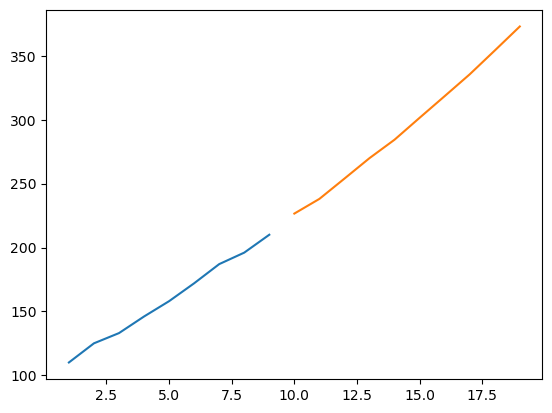

In [25]:
plt.plot(day_new, timeseriesdata)
plt.plot(day_pred, lstoutput)

check predictions against already given values

In [35]:
ypred = model.predict(x, verbose =0)

In [39]:
ypred

array([[145.5491 ],
       [160.19582],
       [169.74922],
       [183.44539],
       [196.94844],
       [212.4522 ]], dtype=float32)

In [51]:
ypred = ypred.reshape(ypred.shape[0], ypred.shape[1],)
y = y.reshape(y.shape[0], 1)
y

array([[146],
       [158],
       [172],
       [187],
       [196],
       [210]])

In [57]:
difference = y - ypred

In [58]:
difference #difference in predicted and true values

array([[ 0.45089722],
       [-2.19581604],
       [ 2.2507782 ],
       [ 3.55461121],
       [-0.94844055],
       [-2.45219421]])